In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
df=pd.read_csv('watson_healthcare_modified.csv')

In [3]:
df.shape

(1676, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
pd.set_option('display.max_columns',None)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.drop('EmployeeID',inplace=True,axis=1)

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
num_col=df.select_dtypes(include=np.number)
cat_col=df.select_dtypes(exclude=np.number)

# Attrition
target variable

In [10]:
df.Attrition.value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

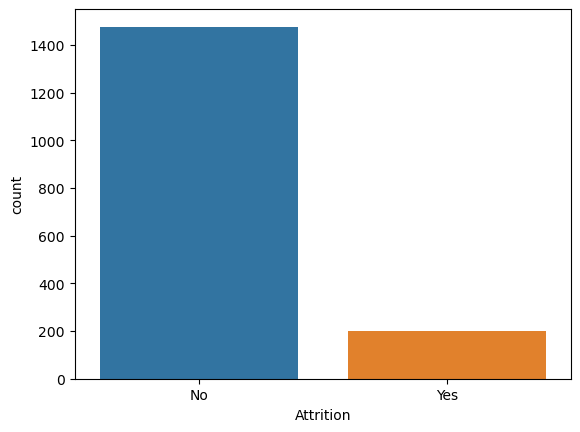

In [11]:
sns.countplot(df.Attrition)

## Age

In [12]:
df.Age.value_counts()

35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64

In [13]:
df.Age.nunique()

43

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

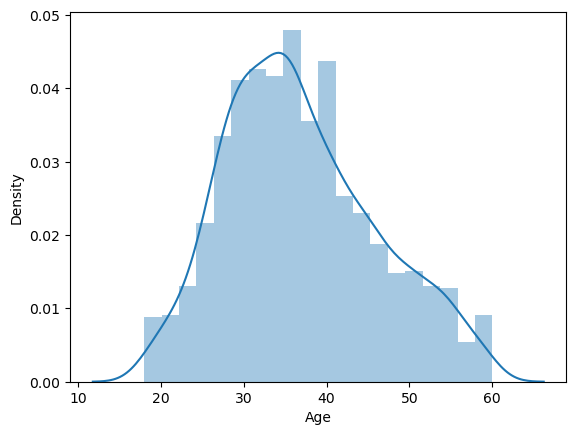

In [14]:
sns.distplot(df.Age)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

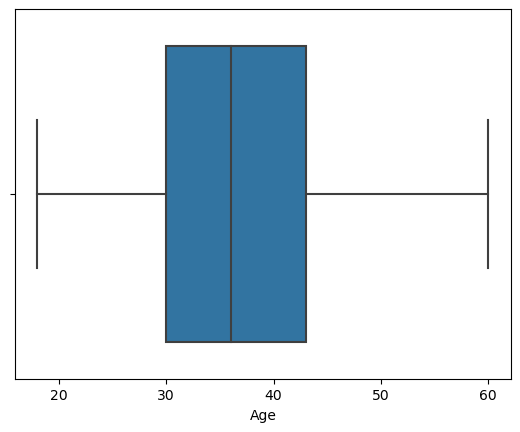

In [15]:
sns.boxplot(df.Age)

In [16]:
model = ols("Age~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq     mean_sq          F  PR(>F)
Attrition     1.0    8039.64692  8039.64692  102.30112     0.0
Residual   1674.0  131556.41514    78.58806        NaN     NaN


## DailyRate

In [17]:
df.DailyRate.value_counts()

691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

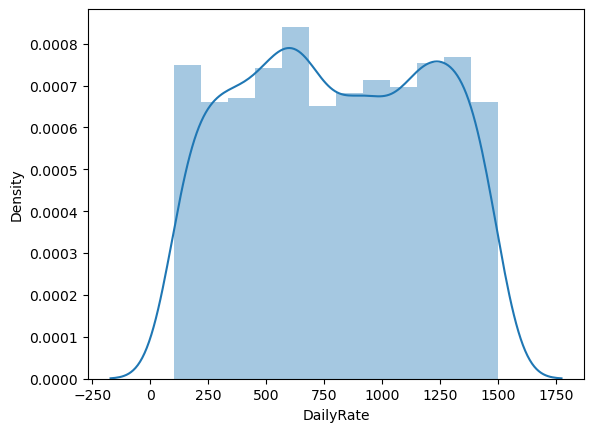

In [18]:
sns.distplot(df.DailyRate)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DailyRate'>

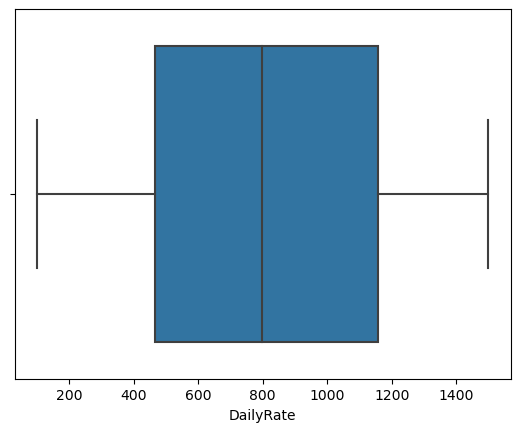

In [19]:
sns.boxplot(df.DailyRate)

In [20]:
model = ols("DailyRate~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  7.845809e+05  784580.93018  4.87603  0.02737
Residual   1674.0  2.693562e+08  160905.74938      NaN      NaN


## Education

In [21]:
df.Education.value_counts()

3    655
4    447
2    322
1    196
5     56
Name: Education, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

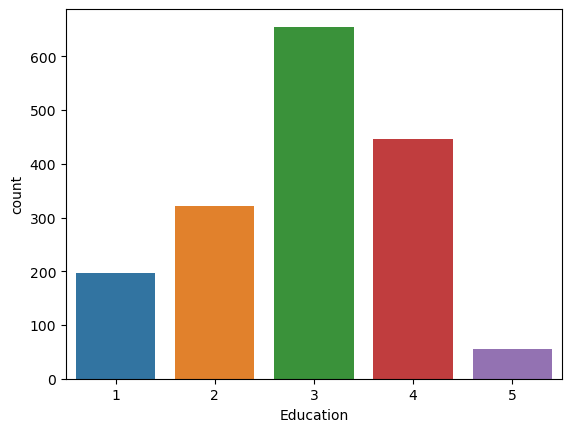

In [22]:
sns.countplot(df.Education)

In [23]:
a=pd.crosstab(df.Education,df.Attrition)
chi2_contingency(a)[1]

0.059555671404858734

In [24]:
df.drop('Education',axis=1,inplace=True)

# EmployeeCount

In [25]:
df.EmployeeCount.value_counts()

1    1676
Name: EmployeeCount, dtype: int64

In [26]:
df.drop('EmployeeCount',axis=1,inplace=True)

## EnvironmentSatisfaction

In [27]:
df.EnvironmentSatisfaction.value_counts()

3    512
4    508
1    330
2    326
Name: EnvironmentSatisfaction, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

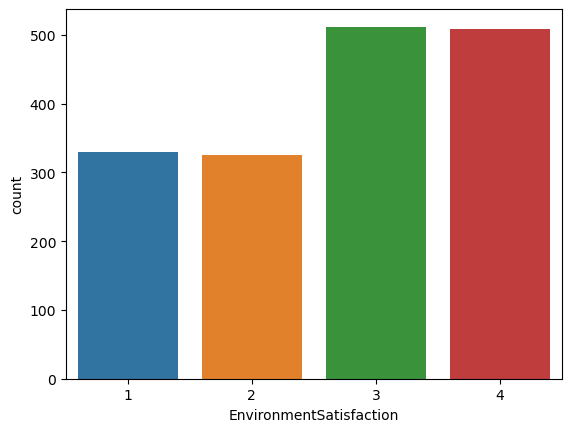

In [28]:
sns.countplot(df.EnvironmentSatisfaction)

In [29]:
a=pd.crosstab(df.EnvironmentSatisfaction,df.Attrition)
chi2_contingency(a)[1]

3.470723479594877e-05

## HourlyRate

In [30]:
df.HourlyRate.value_counts()

48    35
84    34
79    33
66    33
42    33
      ..
50    17
93    17
68    17
38    16
34    14
Name: HourlyRate, Length: 71, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

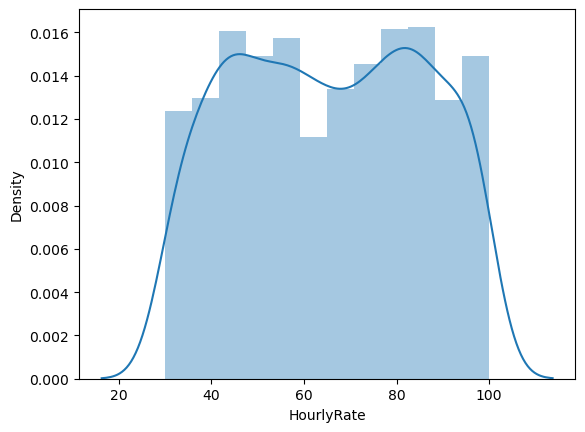

In [31]:
sns.distplot(df.HourlyRate)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HourlyRate'>

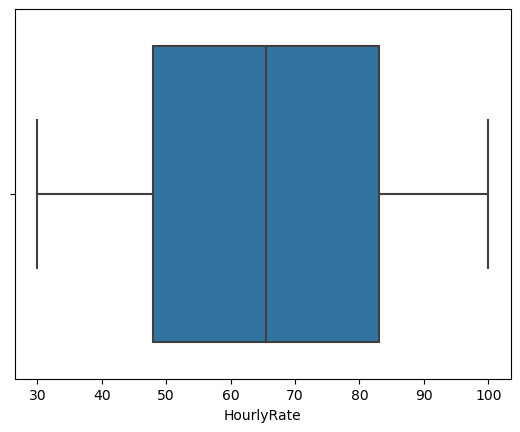

In [32]:
sns.boxplot(df.HourlyRate)

In [33]:
model = ols("HourlyRate~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq    mean_sq        F   PR(>F)
Attrition     1.0     901.26581  901.26581  2.20871  0.13742
Residual   1674.0  683078.24254  408.05152      NaN      NaN


In [34]:
df.drop('HourlyRate',axis=1,inplace=True)

## JobInvolvement

In [35]:
df.JobInvolvement.value_counts()

3    983
2    433
4    164
1     96
Name: JobInvolvement, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

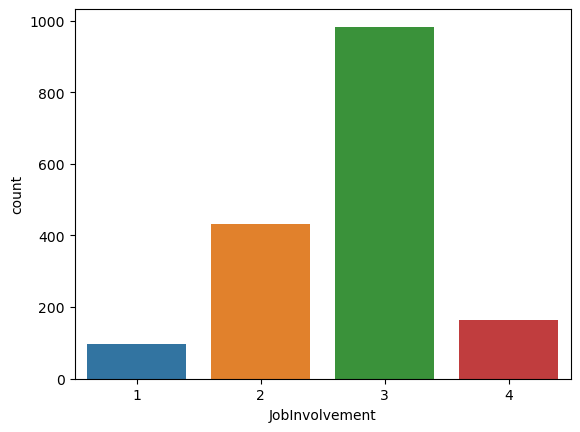

In [36]:
sns.countplot(df.JobInvolvement)

In [37]:
a=pd.crosstab(df.JobInvolvement,df.Attrition)
chi2_contingency(a)[1]

2.9841167560642985e-11

## JobLevel

In [38]:
df.JobLevel.value_counts()

1    621
2    606
3    246
4    122
5     81
Name: JobLevel, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

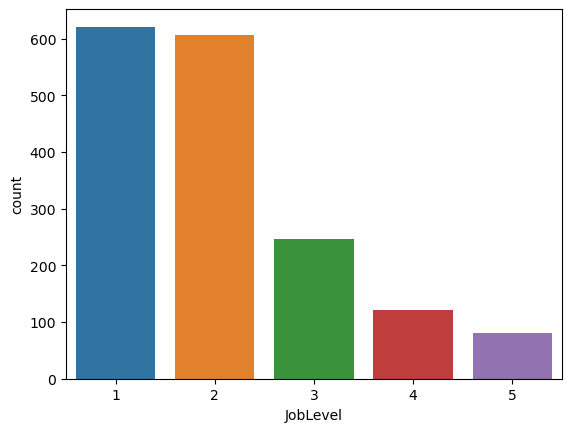

In [39]:
sns.countplot(df.JobLevel)

In [40]:
a=pd.crosstab(df.JobLevel,df.Attrition)
chi2_contingency(a)[1]

2.9922638605677656e-24

# JobSatisfaction

In [41]:
df.JobSatisfaction.value_counts()

4    530
3    507
1    329
2    310
Name: JobSatisfaction, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

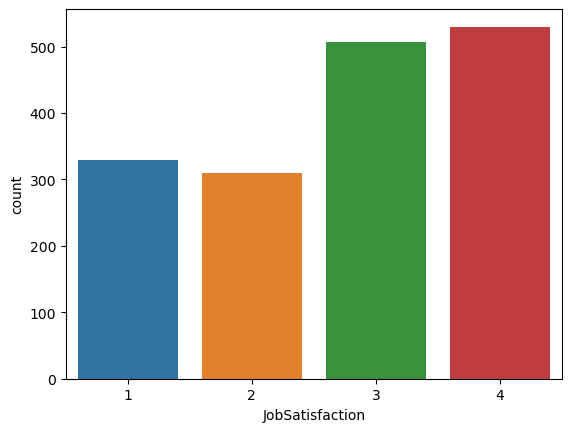

In [42]:
sns.countplot(df.JobSatisfaction)

In [43]:
a=pd.crosstab(df.JobSatisfaction,df.Attrition)
chi2_contingency(a)[1]

0.009352917864491304

## MonthlyIncome

In [44]:
df.MonthlyIncome.value_counts()

2741     4
2340     4
5562     4
2342     4
5993     3
        ..
10475    1
4960     1
7625     1
6796     1
2836     1
Name: MonthlyIncome, Length: 1349, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

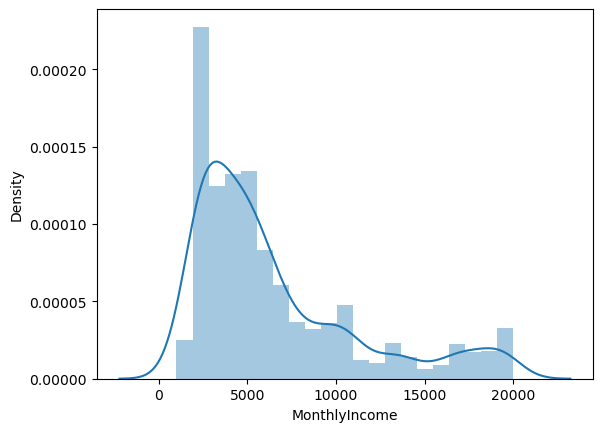

In [45]:
sns.distplot(df.MonthlyIncome)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

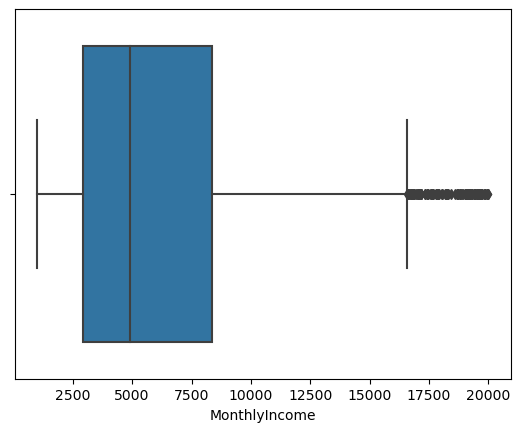

In [46]:
sns.boxplot(df.MonthlyIncome)

In [47]:
q3=df.MonthlyIncome.quantile(0.75)
q1=df.MonthlyIncome.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [48]:
df.MonthlyIncome=np.where(df.MonthlyIncome>upper,upper,df.MonthlyIncome)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

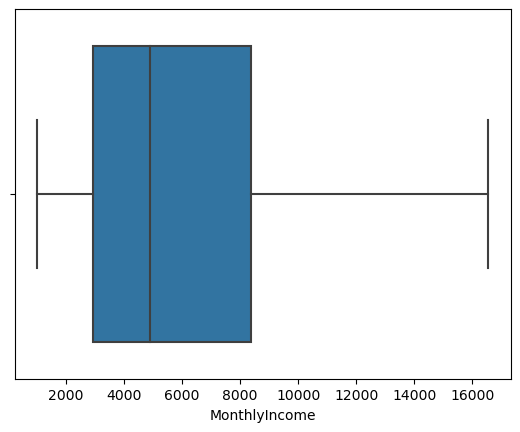

In [49]:
sns.boxplot(df.MonthlyIncome)

In [50]:
model = ols("MonthlyIncome~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq       mean_sq         F  PR(>F)
Attrition     1.0  1.275828e+09  1.275828e+09  69.69261     0.0
Residual   1674.0  3.064508e+10  1.830650e+07       NaN     NaN


# MonthlyRate

In [51]:
df.MonthlyRate.value_counts()

4223     4
19373    4
11652    3
9150     3
7744     3
        ..
17654    1
15232    1
18959    1
7791     1
26997    1
Name: MonthlyRate, Length: 1427, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

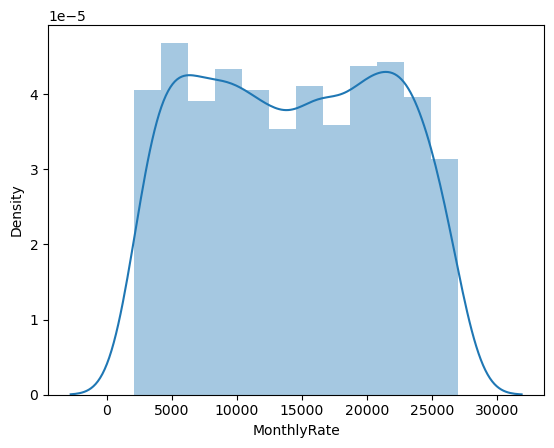

In [52]:
sns.distplot(df.MonthlyRate)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyRate'>

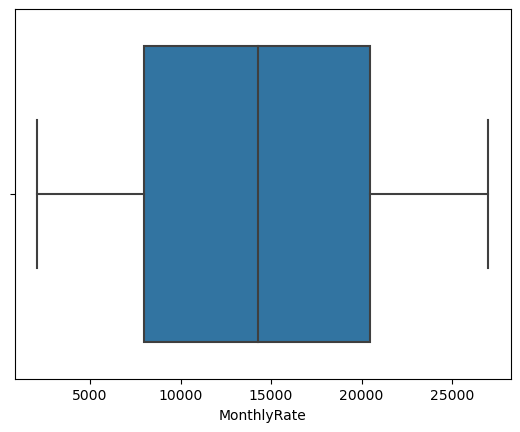

In [53]:
sns.boxplot(df.MonthlyRate)

In [54]:
model = ols("MonthlyRate~Attrition", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


               df        sum_sq       mean_sq        F   PR(>F)
Attrition     1.0  1.786274e+08  1.786274e+08  3.51027  0.06116
Residual   1674.0  8.518488e+10  5.088703e+07      NaN      NaN


In [55]:
df.drop('MonthlyRate',inplace=True,axis=1)

## NumCompaniesWorked

In [56]:
df.NumCompaniesWorked.value_counts()

1    601
0    223
3    180
2    173
4    156
7     84
6     79
5     70
9     59
8     51
Name: NumCompaniesWorked, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

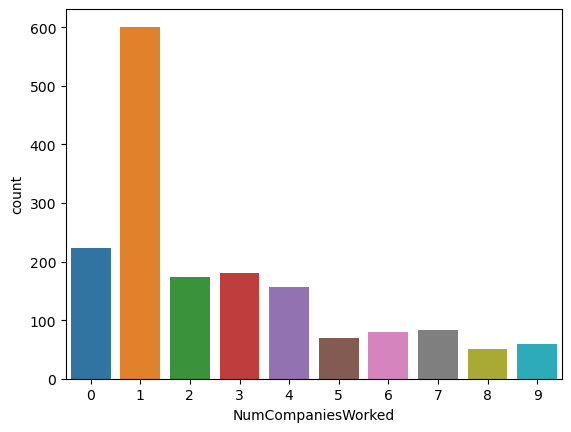

In [57]:
sns.countplot(df.NumCompaniesWorked)

In [58]:
a=pd.crosstab(df.NumCompaniesWorked,df.Attrition)
chi2_contingency(a)[1]

3.259510514390069e-05

## PercentSalaryHike

In [59]:
df.PercentSalaryHike.value_counts()

11    241
13    236
14    229
12    227
15    114
18    103
17     93
19     92
16     89
20     63
22     60
21     54
23     31
24     23
25     21
Name: PercentSalaryHike, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

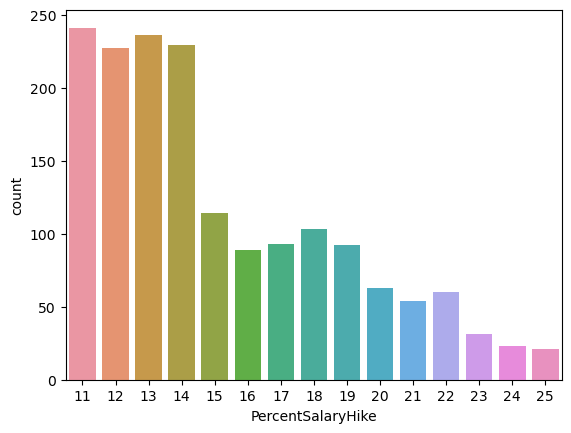

In [60]:
sns.countplot(df.PercentSalaryHike)

In [61]:
a=pd.crosstab(df.PercentSalaryHike,df.Attrition)
chi2_contingency(a)[1]

0.6614745528981447

In [62]:
df.drop('PercentSalaryHike',inplace=True,axis=1)

## PerformanceRating

In [63]:
df.PerformanceRating.value_counts()

3    1424
4     252
Name: PerformanceRating, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

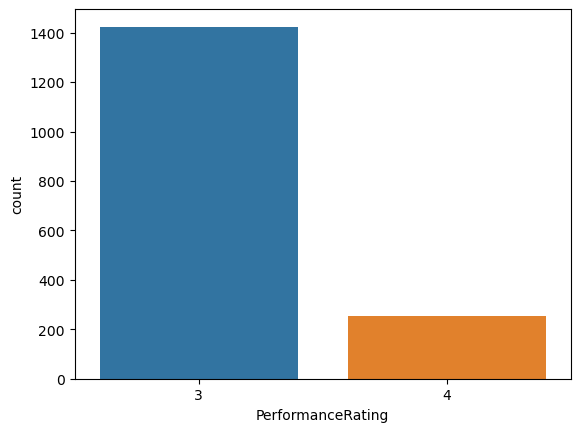

In [64]:
sns.countplot(df.PerformanceRating)

## RelationshipSatisfaction

In [65]:
df.RelationshipSatisfaction.value_counts()

3    526
4    494
2    346
1    310
Name: RelationshipSatisfaction, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

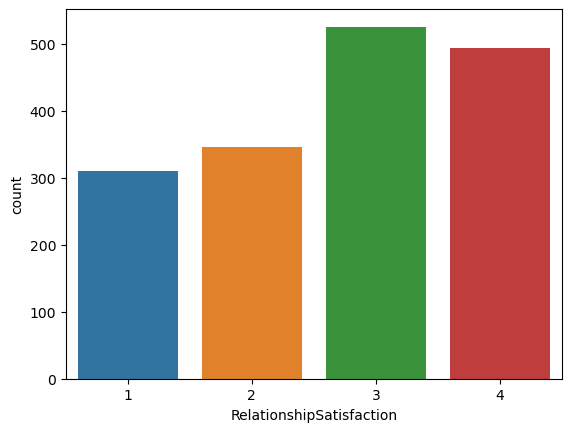

In [66]:
sns.countplot(df.RelationshipSatisfaction)

In [67]:
a=pd.crosstab(df.RelationshipSatisfaction,df.Attrition)
chi2_contingency(a)[1]

0.6642282385523428

In [68]:
df.drop('RelationshipSatisfaction',inplace=True,axis=1)

# StandardHours

In [69]:
df.StandardHours.value_counts()

80    1676
Name: StandardHours, dtype: int64

In [70]:
df.drop('StandardHours',inplace=True,axis=1)

## Shift

In [71]:
df.Shift.value_counts()

0    708
1    684
2    185
3     99
Name: Shift, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shift', ylabel='count'>

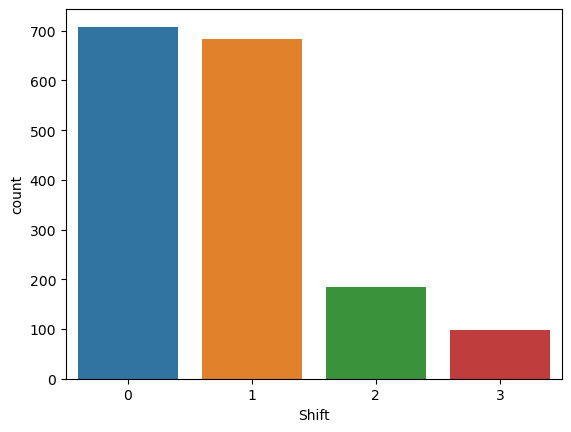

In [72]:
sns.countplot(df.Shift)

In [73]:
a=pd.crosstab(df.Shift,df.Attrition)
chi2_contingency(a)[1]

1.388623941811363e-16

# TotalWorkingYears

In [74]:
df.TotalWorkingYears.value_counts()

10    233
6     140
8     123
9     108
5     100
1      94
7      88
4      70
12     51
3      50
15     47
17     40
16     40
11     39
13     39
21     39
2      36
14     35
20     34
18     30
23     27
22     25
19     25
24     22
25     17
28     16
26     15
31     12
29     12
32     11
0      11
30      8
33      8
36      7
27      7
34      6
37      4
35      4
40      2
38      1
Name: TotalWorkingYears, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

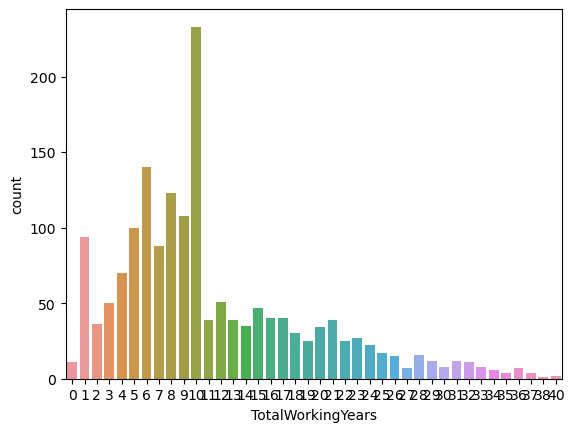

In [75]:
sns.countplot(df.TotalWorkingYears)

In [76]:
a=pd.crosstab(df.TotalWorkingYears,df.Attrition)
chi2_contingency(a)[1]

3.6531383269383474e-27

# TrainingTimesLastYear

In [77]:
df.TrainingTimesLastYear.value_counts()

2    611
3    567
4    143
5    137
1     84
6     73
0     61
Name: TrainingTimesLastYear, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

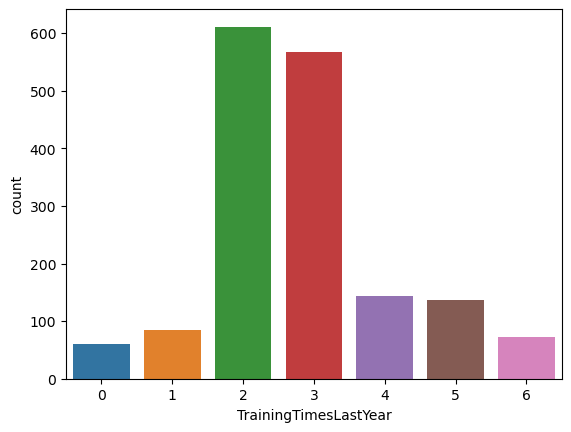

In [78]:
sns.countplot(df.TrainingTimesLastYear)

In [79]:
a=pd.crosstab(df.TrainingTimesLastYear,df.Attrition)
chi2_contingency(a)[1]

0.0030345241109726554

# WorkLifeBalance

In [80]:
df.WorkLifeBalance.value_counts()

3    1028
2     385
4     173
1      90
Name: WorkLifeBalance, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

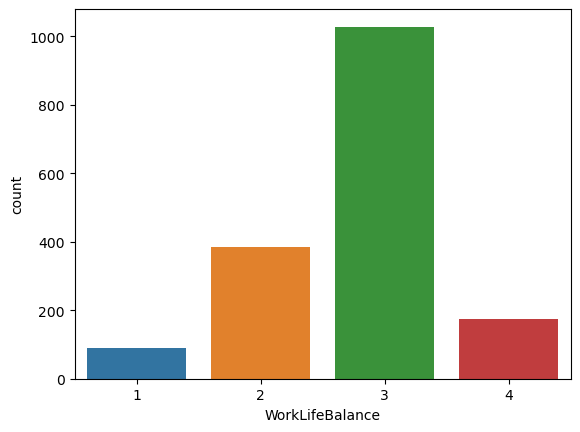

In [81]:
sns.countplot(df.WorkLifeBalance)

In [82]:
a=pd.crosstab(df.WorkLifeBalance,df.Attrition)
chi2_contingency(a)[1]

1.4980223398086616e-05

# YearsAtCompany

In [83]:
df.YearsAtCompany.value_counts()

5     219
1     195
3     152
2     146
10    137
4     120
7     104
9      94
8      93
6      86
0      46
11     37
20     32
13     28
15     23
14     20
22     19
12     17
21     17
19     14
18     13
16     12
17     12
24      7
33      6
25      5
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

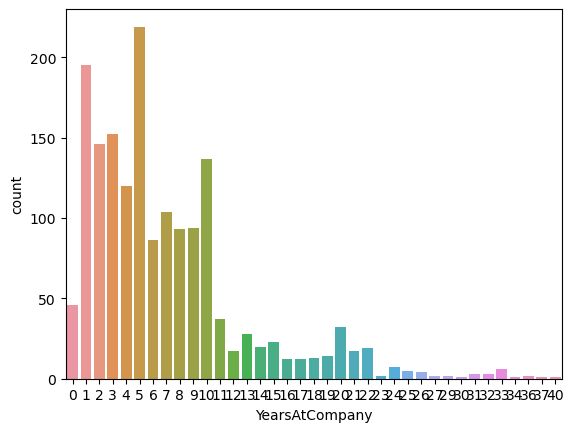

In [84]:
sns.countplot(df.YearsAtCompany)

In [85]:
a=pd.crosstab(df.YearsAtCompany,df.Attrition)
chi2_contingency(a)[1]

5.4853064231239483e-17

## YearsInCurrentRole

In [86]:
df.YearsInCurrentRole.value_counts()

2     434
0     273
7     257
3     146
4     114
8     104
9      79
1      61
5      43
6      43
10     33
11     26
13     16
14     12
12     11
15      9
16      7
17      5
18      3
Name: YearsInCurrentRole, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

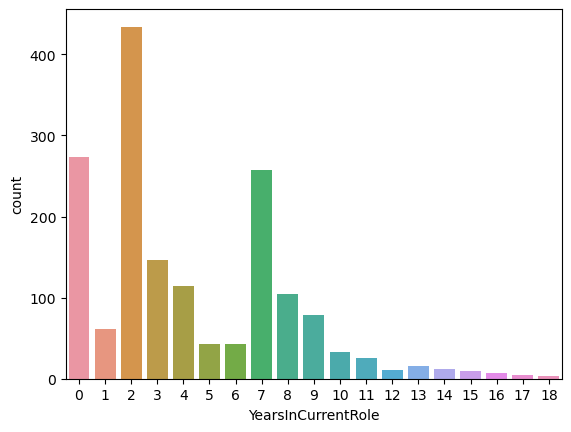

In [87]:
sns.countplot(df.YearsInCurrentRole)

In [88]:
a=pd.crosstab(df.YearsInCurrentRole,df.Attrition)
chi2_contingency(a)[1]

1.1238737536813488e-14

## YearsSinceLastPromotion

In [89]:
df.YearsSinceLastPromotion.value_counts()

0     660
1     402
2     186
7      83
3      66
4      63
5      50
6      41
11     30
8      21
9      20
15     15
13     12
12     11
14      9
10      7
Name: YearsSinceLastPromotion, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

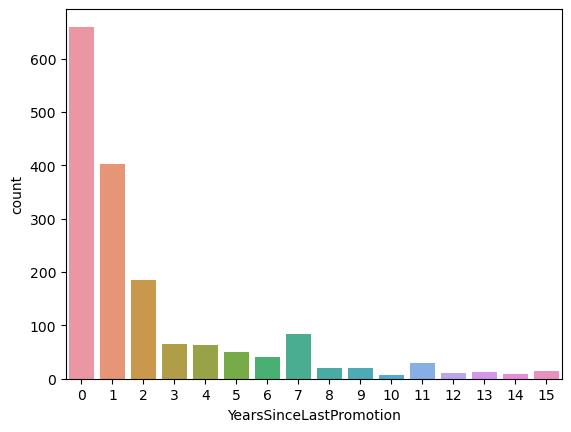

In [90]:
sns.countplot(df.YearsSinceLastPromotion)

In [91]:
a=pd.crosstab(df.YearsSinceLastPromotion,df.Attrition)
chi2_contingency(a)[1]

0.0011388067616569014

# YearsWithCurrManager

In [92]:
df.YearsWithCurrManager.value_counts()

2     404
0     297
7     247
3     155
8     122
4     108
1      83
9      77
5      35
6      34
10     32
11     25
12     21
13     16
17      7
15      6
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

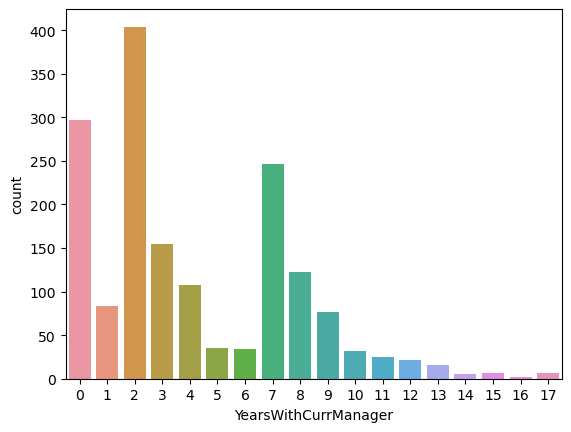

In [93]:
sns.countplot(df.YearsWithCurrManager)

In [94]:
a=pd.crosstab(df.YearsWithCurrManager,df.Attrition)
chi2_contingency(a)[1]

5.957624051085805e-17

# BusinessTravel

In [95]:
df.BusinessTravel.value_counts()

Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

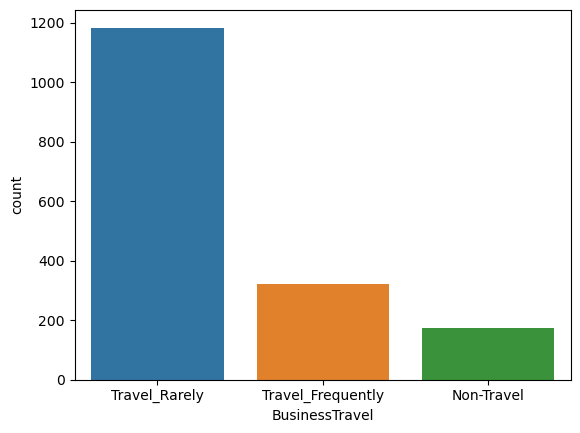

In [96]:
sns.countplot(df.BusinessTravel)

In [97]:
a=pd.crosstab(df.BusinessTravel,df.Attrition)
chi2_contingency(a)[1]

0.001119456597466221

# Department

In [98]:
df.Department.value_counts()

Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

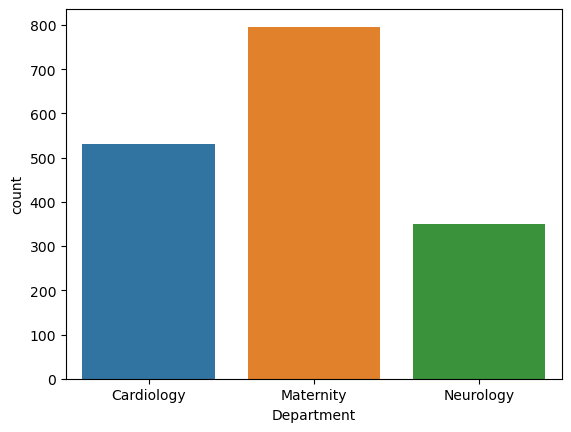

In [99]:
sns.countplot(df.Department)

<AxesSubplot:xlabel='Department', ylabel='count'>

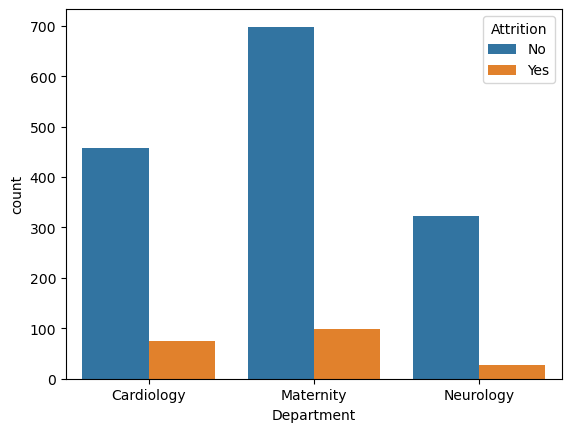

In [100]:
sns.countplot(x='Department',hue='Attrition',data=df)

In [101]:
a=pd.crosstab(df.Department,df.Attrition)
chi2_contingency(a)[1]

0.018194265980794714

## EducationField

In [102]:
df.EducationField.value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EducationField', ylabel='count'>

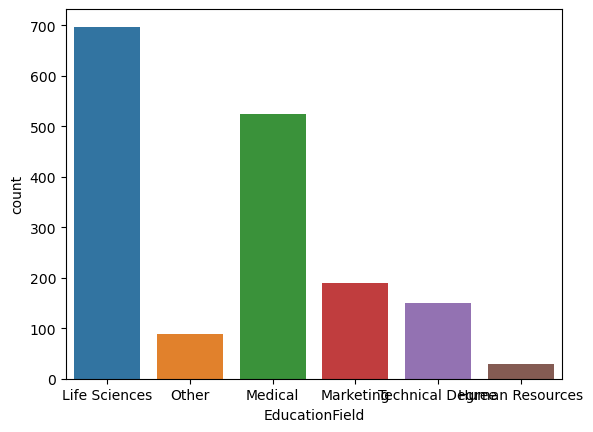

In [103]:
sns.countplot(df.EducationField)

In [104]:
a=pd.crosstab(df.EducationField,df.Attrition)
chi2_contingency(a)[1]

0.1632877592033215

In [105]:
df.drop('EducationField',inplace=True,axis=1)

## Gender

In [106]:
df.Gender.value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

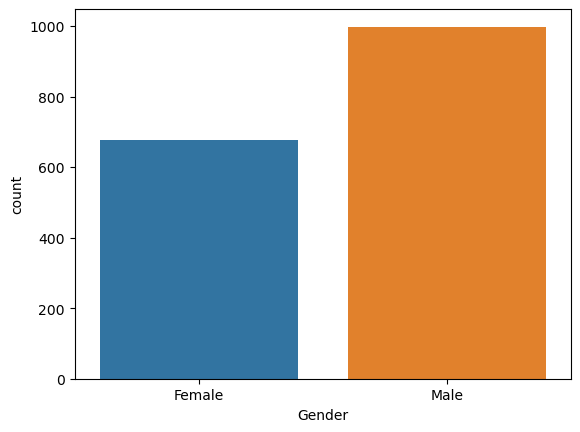

In [107]:
sns.countplot(df.Gender)

In [108]:
a=pd.crosstab(df.Gender,df.Attrition)
chi2_contingency(a)[1]

0.4419454127111361

In [109]:
df.drop('Gender',axis=1,inplace=True)

# JobRole

In [110]:
df.JobRole.value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobRole', ylabel='count'>

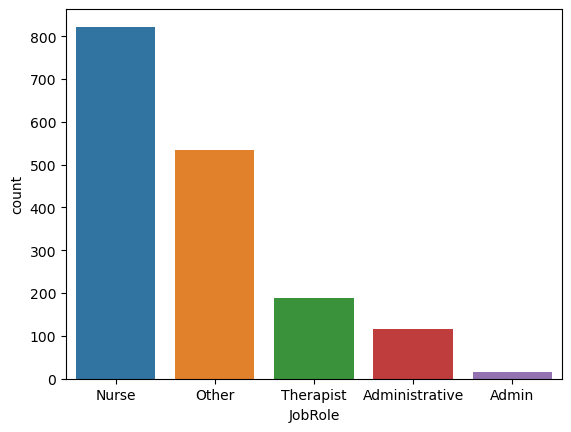

In [111]:
sns.countplot(df.JobRole)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

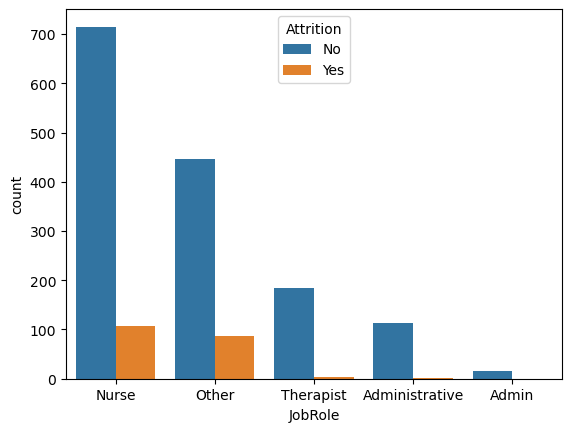

In [112]:
sns.countplot(x='JobRole',hue='Attrition',data=df)

In [113]:
a=pd.crosstab(df.JobRole,df.Attrition)
chi2_contingency(a)[1]

7.58311282316894e-09

# MaritalStatus

In [114]:
df.MaritalStatus.value_counts()

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

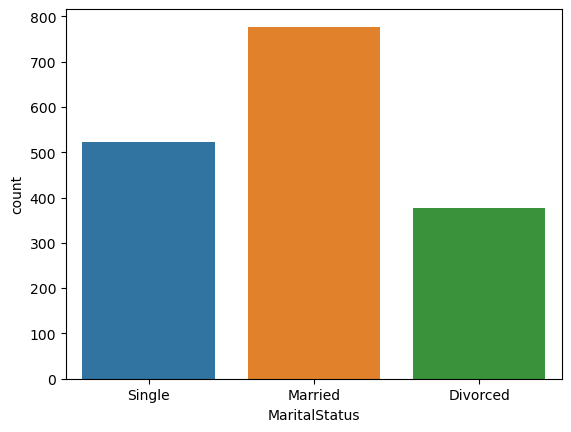

In [115]:
sns.countplot(df.MaritalStatus)

In [116]:
a=pd.crosstab(df.MaritalStatus,df.Attrition)
chi2_contingency(a)[1]

1.816259262576239e-16

# Over18

In [117]:
df.Over18.value_counts()

Y    1676
Name: Over18, dtype: int64

In [118]:
df.drop('Over18',axis=1,inplace=True)

# OverTime

In [119]:
df.OverTime.value_counts()

No     1200
Yes     476
Name: OverTime, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverTime', ylabel='count'>

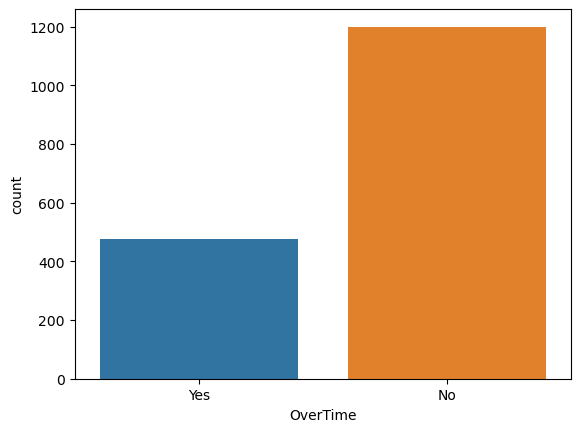

In [120]:
sns.countplot(df.OverTime)

In [121]:
a=pd.crosstab(df.OverTime,df.Attrition)
chi2_contingency(a)[1]

6.865486230870457e-43

<AxesSubplot:>

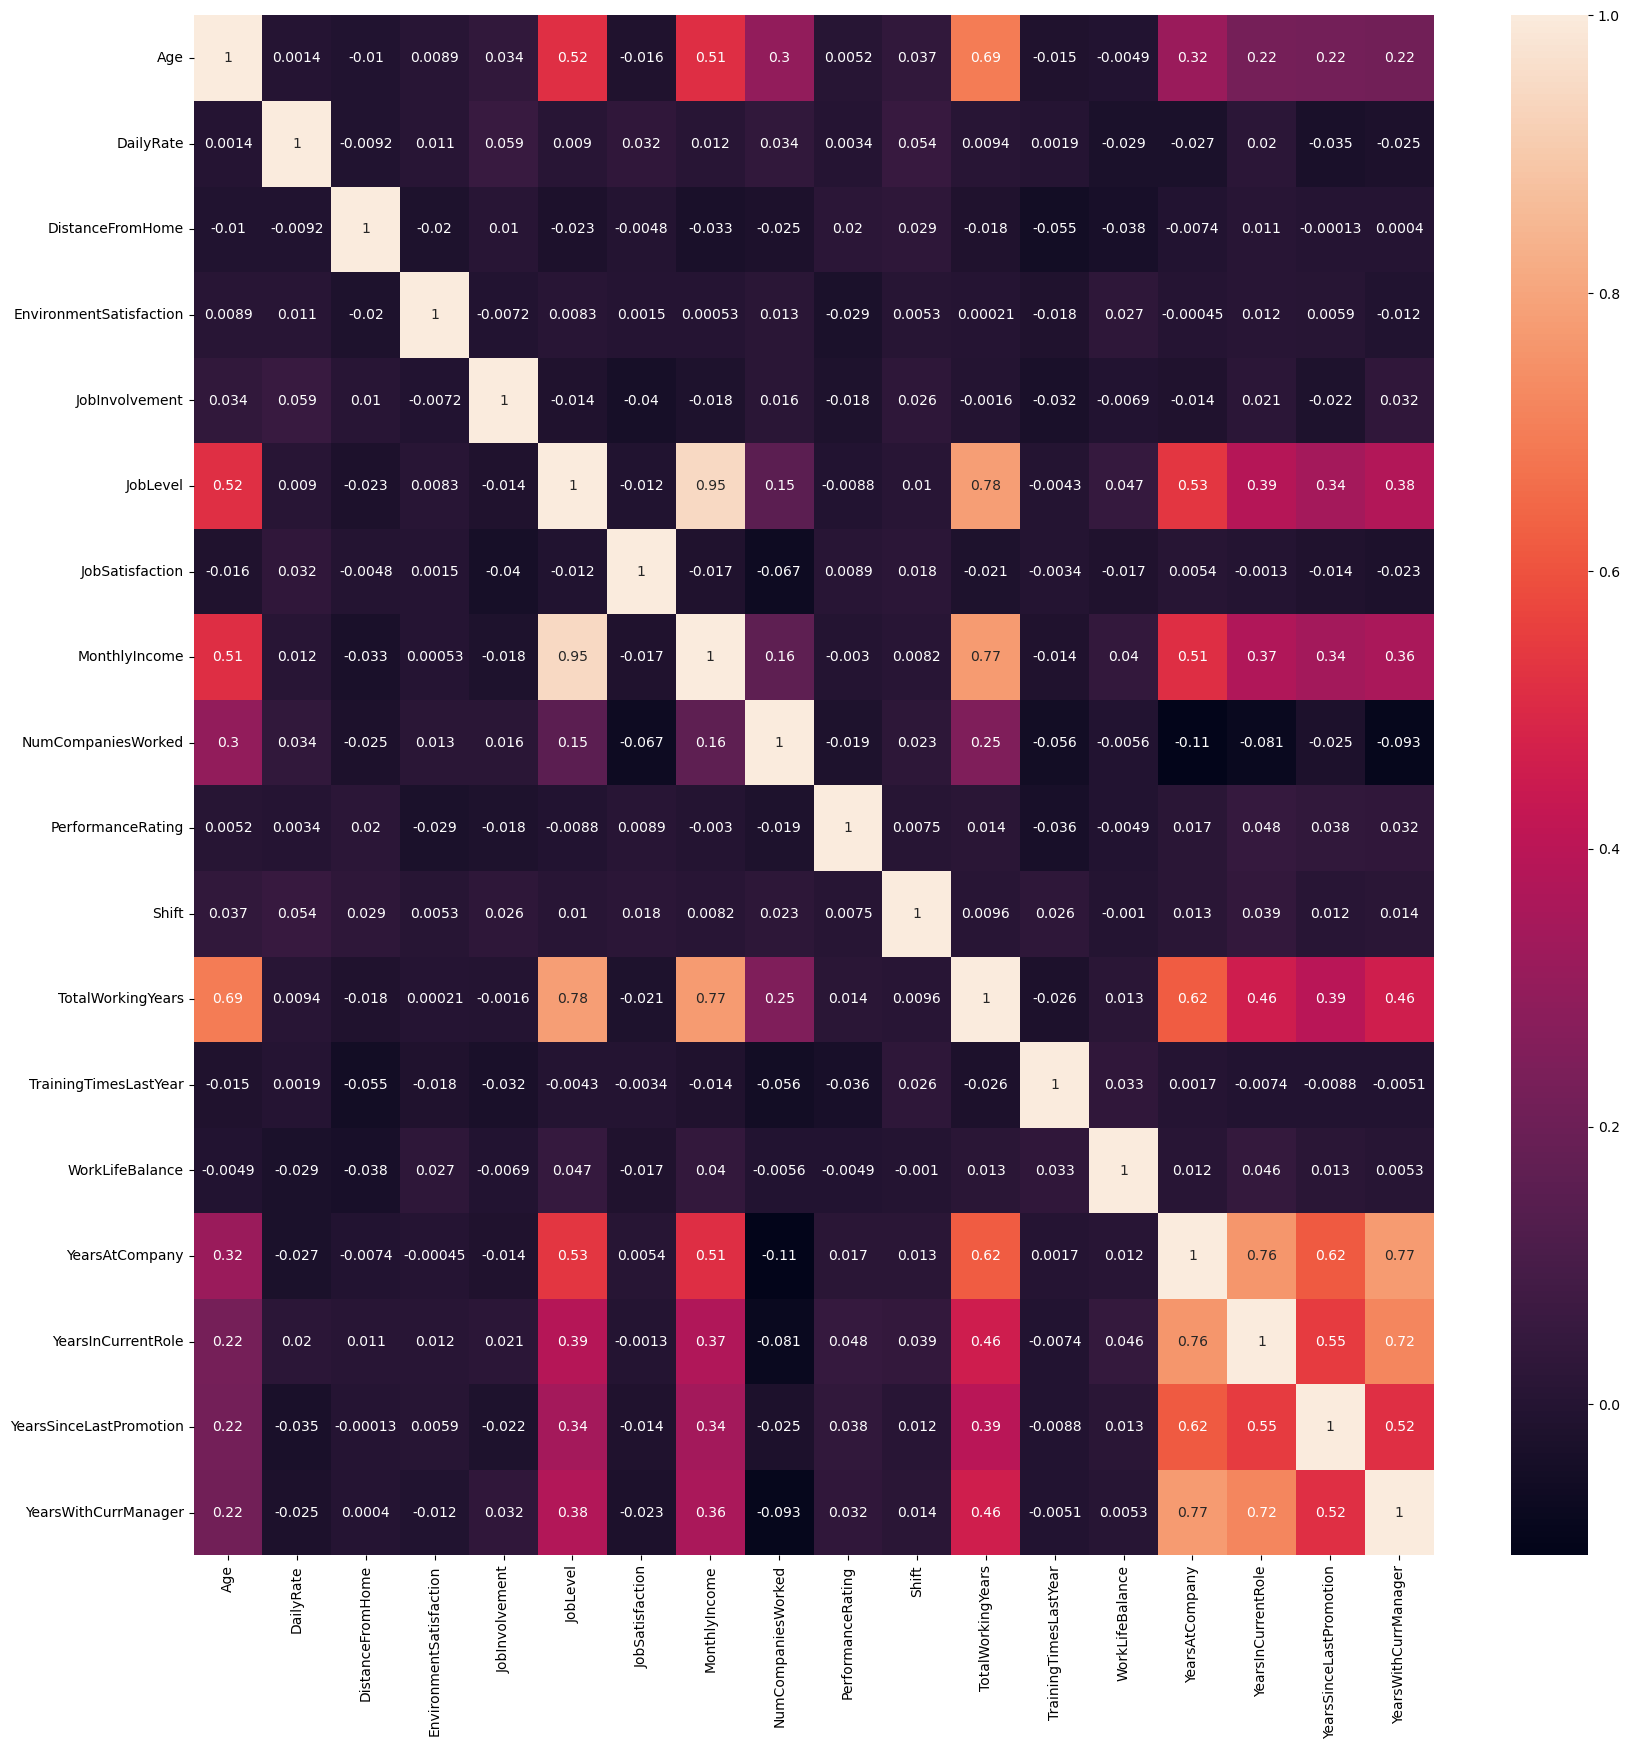

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

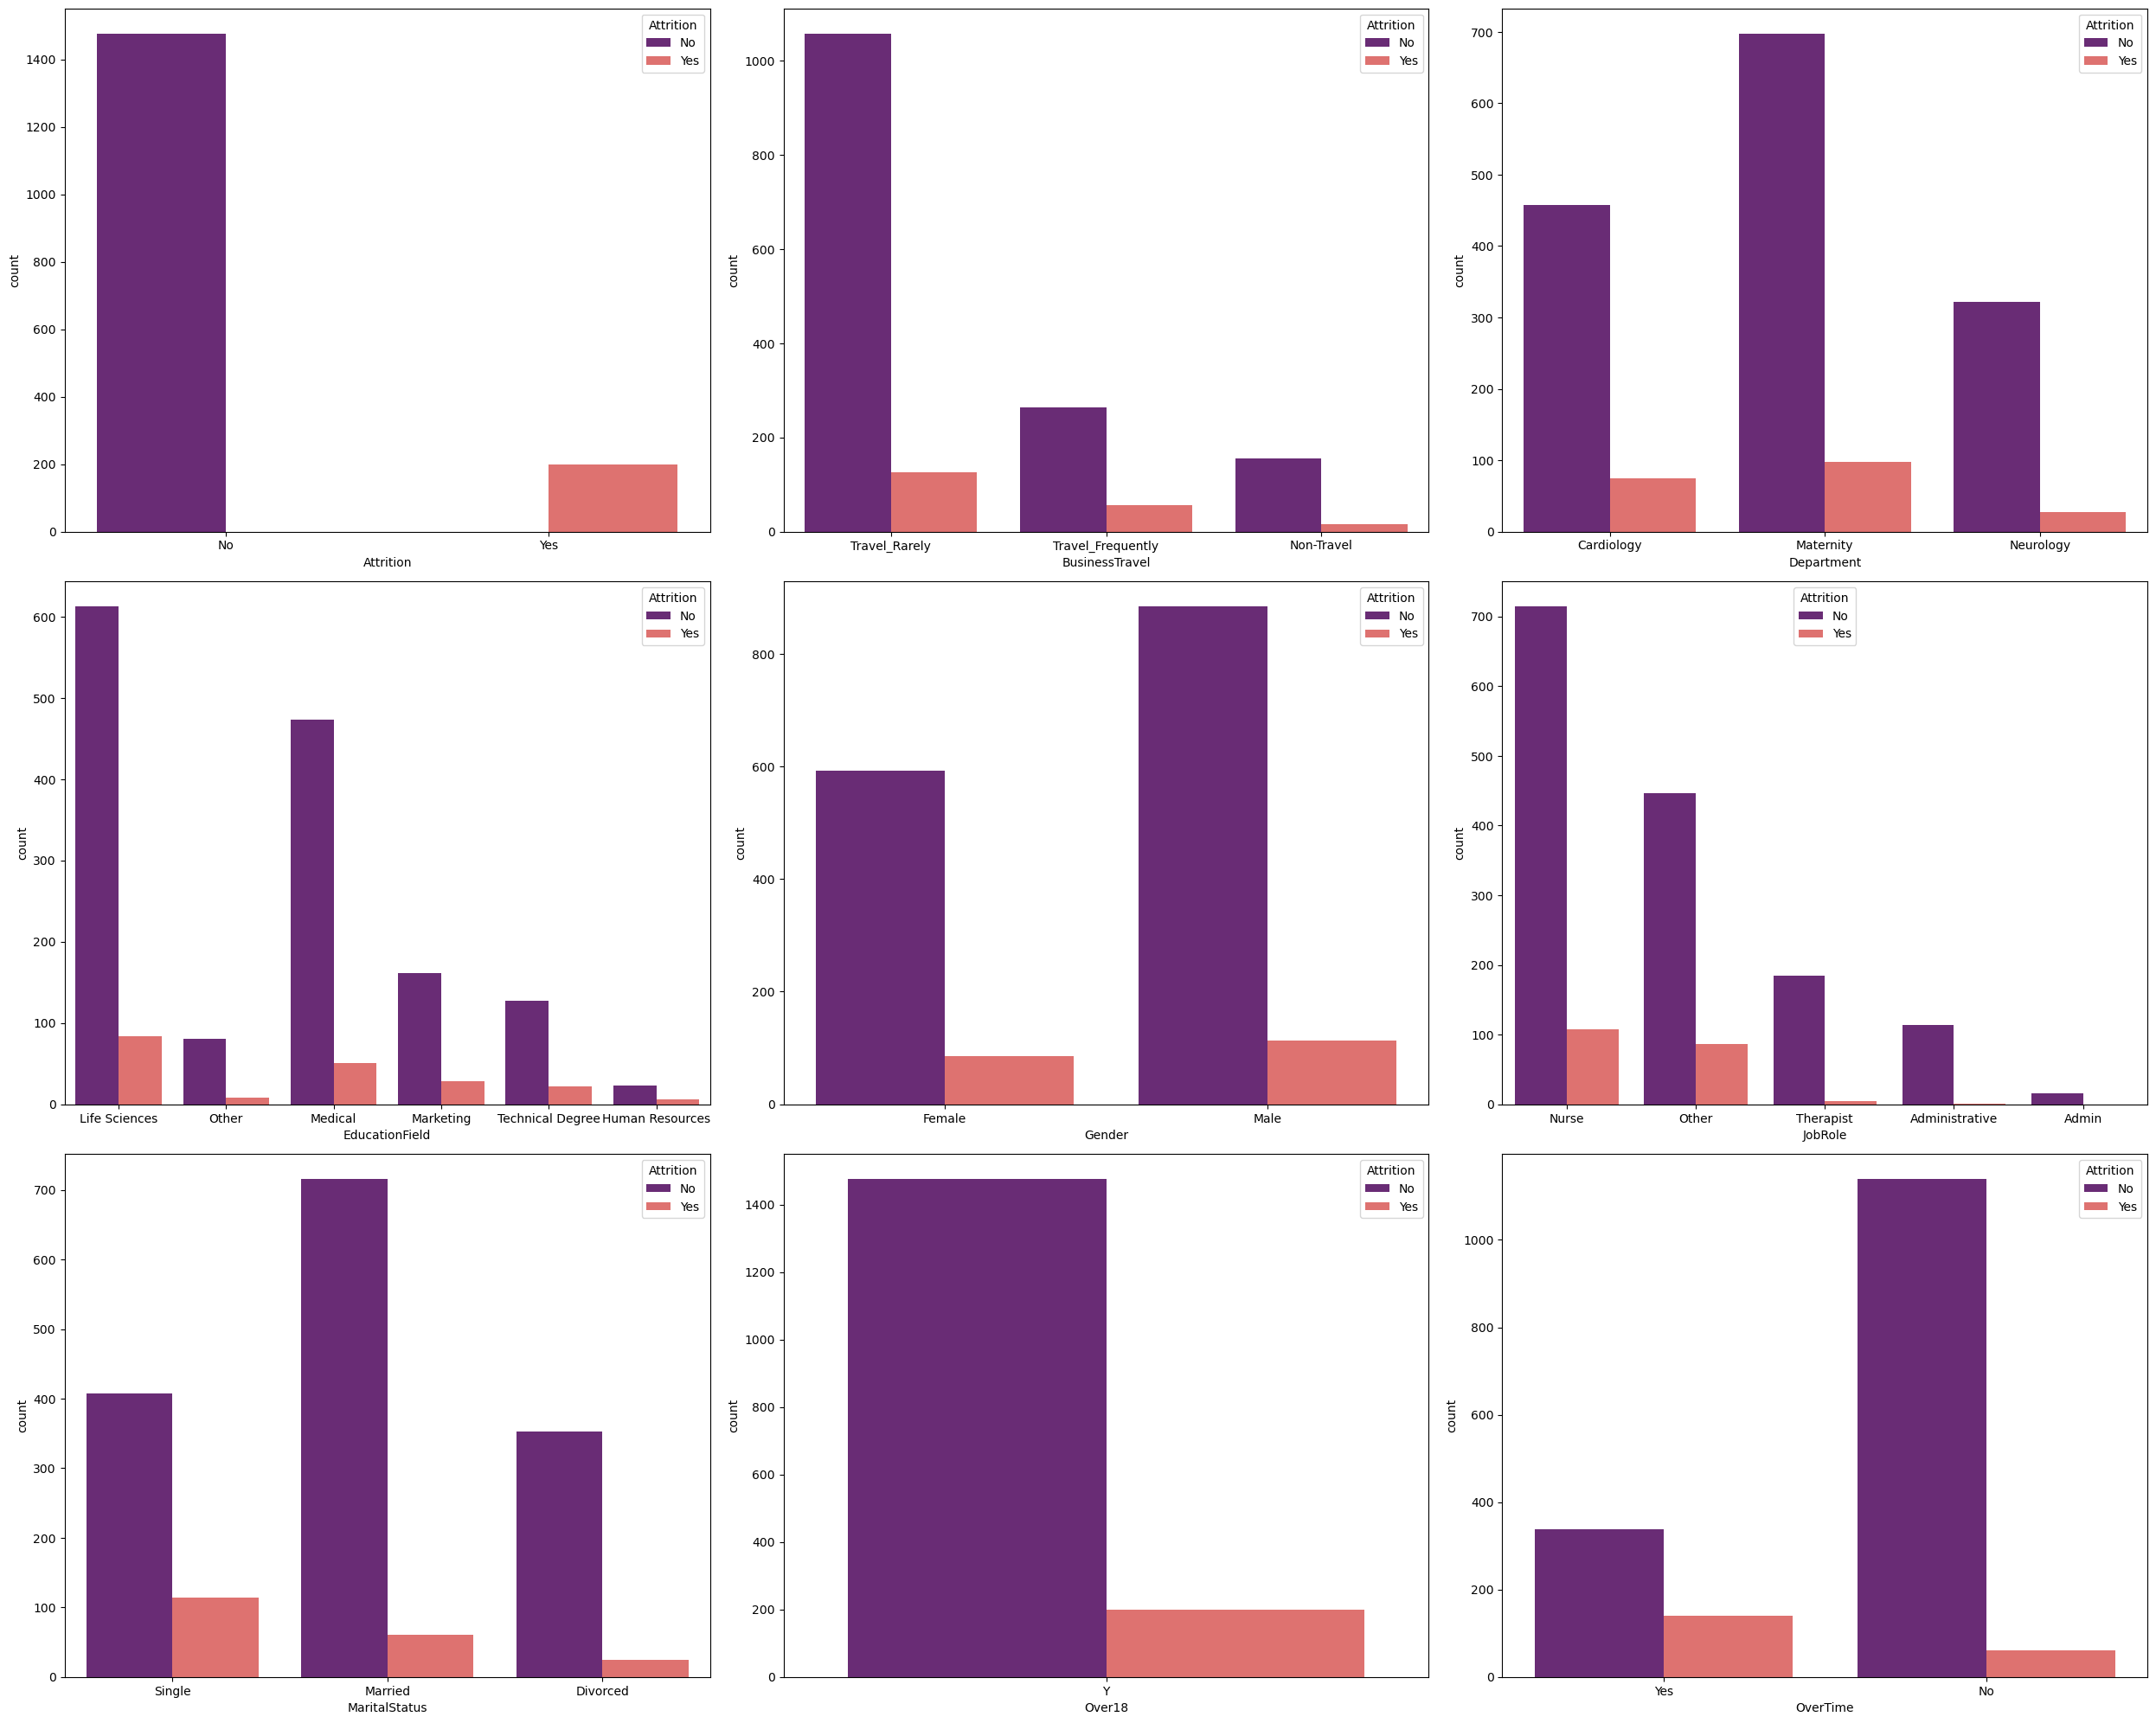

In [123]:
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_col):
    plt.subplot(3,3,index+1)
    sns.countplot(data=cat_col,x=column,hue = cat_col.Attrition,palette="magma")
    
plt.tight_layout(pad = 1.0)
plt.show()

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
vif_da=num_col
vif_data=pd.DataFrame()
vif_data['feature']=vif_da.columns

vif_data['VIF']=[variance_inflation_factor(vif_da.values,i)for i in range(len(vif_da.columns))]
print(vif_data)

                     feature        VIF
0                        Age   2.090250
1                  DailyRate   1.020237
2           DistanceFromHome   1.015438
3                  Education   1.056477
4              EmployeeCount   0.000000
5    EnvironmentSatisfaction   1.010731
6                 HourlyRate   1.019904
7             JobInvolvement   1.020340
8                   JobLevel  11.394760
9            JobSatisfaction   1.018263
10             MonthlyIncome  11.049503
11               MonthlyRate   1.016241
12        NumCompaniesWorked   1.257385
13         PercentSalaryHike   2.450154
14         PerformanceRating   2.451091
15  RelationshipSatisfaction   1.018564
16             StandardHours   0.000000
17                     Shift   1.016916
18         TotalWorkingYears   4.781469
19     TrainingTimesLastYear   1.012540
20           WorkLifeBalance   1.013275
21            YearsAtCompany   4.542940
22        YearsInCurrentRole   2.750392
23   YearsSinceLastPromotion   1.674716


C:\Users\abhay\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [126]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,3,2,Nurse,4,Single,5993.0,8,Yes,3,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,3,2,2,Other,2,Married,5130.0,1,No,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,4,2,1,Nurse,3,Single,2090.0,6,Yes,3,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,3,1,Other,3,Married,2909.0,1,Yes,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,3,1,Nurse,2,Married,3468.0,9,No,3,1,6,3,3,2,2,2,2


In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
le=LabelEncoder()

In [129]:
df.Attrition=le.fit_transform(df.Attrition)


In [130]:
p=pd.get_dummies(df.BusinessTravel,drop_first=True)
o=pd.get_dummies(df.Department,drop_first=True)
i=pd.get_dummies(df.JobRole,drop_first=True)
u=pd.get_dummies(df.OverTime,drop_first=True)
y=pd.get_dummies(df.MaritalStatus,drop_first=True)


In [131]:
df=pd.concat([p,o,i,u,df],axis=1)

In [132]:
df.drop(['BusinessTravel','Department','JobRole','OverTime','MaritalStatus'],axis=1,inplace=True)

In [133]:
df.head()

,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Administrative,Nurse,Other,Therapist,Yes,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,0,0,1,0,0,1,41,0,1102,1,2,3,2,4,5993.0,8,3,0,8,0,1,6,4,0,5
1,1,0,1,0,0,0,1,0,0,49,0,279,8,3,2,2,2,5130.0,1,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,1,0,0,1,37,1,1373,2,4,2,1,3,2090.0,6,3,0,7,3,3,0,0,0,0
3,1,0,1,0,0,0,1,0,1,33,0,1392,3,4,3,1,3,2909.0,1,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,1,0,0,0,27,0,591,2,1,3,1,2,3468.0,9,3,1,6,3,3,2,2,2,2


## Smote

In [134]:
df.Attrition.value_counts()

0    1477
1     199
Name: Attrition, dtype: int64

In [135]:
no=df[df.Attrition==0]
yes=df[df.Attrition==1]

from sklearn.utils import resample

over=resample(yes,replace=True,n_samples=len(no),random_state=23)

dfsmote=pd.concat([no,over])
dfsmote.Attrition.value_counts()

0    1477
1    1477
Name: Attrition, dtype: int64

In [136]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_x

# 5. Data Preprocessing

In [139]:

x = dfsmote.drop("Attrition",axis = 1)
y =  dfsmote["Attrition"]

In [140]:
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [141]:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

In [142]:
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=0.3)

In [143]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [144]:
params={
    'n_estimators':[900,1000,1100,1500],
    'max_features':['sqrt',0.25],
    'min_samples_split':[2,4,6]
}

In [145]:
gd=GridSearchCV(rf,params,cv=3)

In [146]:
gd.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [900, 1000, 1100, 1500]})

In [147]:
rf=gd.best_estimator_
rf

RandomForestClassifier(min_samples_split=4, n_estimators=1500)

In [148]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(min_samples_split=4, n_estimators=1500)

In [149]:
y_pred=rf.predict(xtest)

In [150]:
confusion_matrix(ytest,y_pred)

array([[428,  17],
       [  4, 438]], dtype=int64)

In [151]:
rf.score(xtest,ytest)

0.9763246899661782

In [152]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       445
           1       0.96      0.99      0.98       442

    accuracy                           0.98       887
   macro avg       0.98      0.98      0.98       887
weighted avg       0.98      0.98      0.98       887



In [153]:
prob=rf.predict_proba(xtest)
prob

array([[5.07676768e-02, 9.49232323e-01],
       [9.08672589e-01, 9.13274115e-02],
       [1.91111111e-03, 9.98088889e-01],
       ...,
       [1.66666667e-04, 9.99833333e-01],
       [9.45644444e-01, 5.43555556e-02],
       [0.00000000e+00, 1.00000000e+00]])

In [154]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9966114189841884


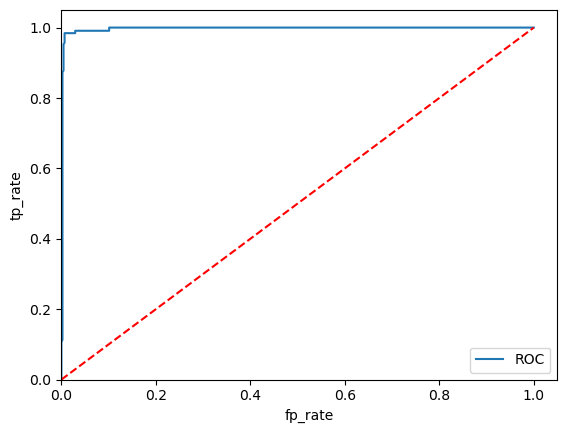

In [155]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

In [156]:
from sklearn.tree import DecisionTreeClassifier


In [157]:
dt=DecisionTreeClassifier()


In [158]:
parm={'max_depth':[80,90,100],'min_samples_leaf':[1,2,3,4,5]}

In [159]:
grid=GridSearchCV(dt,parm,cv=5)

In [160]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [80, 90, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [161]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=90)

In [162]:
y_pred=grid.predict(xtest)

In [163]:
confusion_matrix(ytest,y_pred)

array([[410,  35],
       [  4, 438]], dtype=int64)

In [164]:
grid.score(xtest,ytest)

0.9560315670800451

In [165]:
accuracy_score(ytest,y_pred)

0.9560315670800451

In [166]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       445
           1       0.93      0.99      0.96       442

    accuracy                           0.96       887
   macro avg       0.96      0.96      0.96       887
weighted avg       0.96      0.96      0.96       887



In [167]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(xtrain,ytrain)

LogisticRegression()

In [168]:
p_x=lm.predict(xtrain)

In [169]:
lm.score(xtest,ytest)

0.8861330326944757

In [170]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytrain,p_x))

0.33718146465432297